In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('Genre', 'Gender', regex=False)
print("Columns:", df.columns.tolist())


Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


In [5]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df['High_Spender'] = np.where(df['Spending Score (1-100)'] > 50, 1, 0)

In [6]:
X = df[['Gender', 'Age', 'Annual Income (k$)']]
y = df['High_Spender']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)


Accuracy: 0.725

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.70      0.74        23
           1       0.65      0.76      0.70        17

    accuracy                           0.72        40
   macro avg       0.73      0.73      0.72        40
weighted avg       0.74      0.72      0.73        40



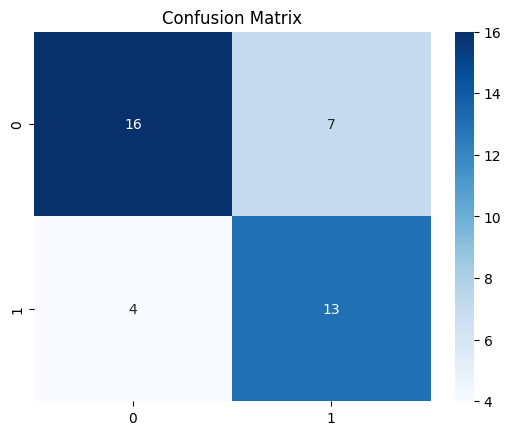

In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

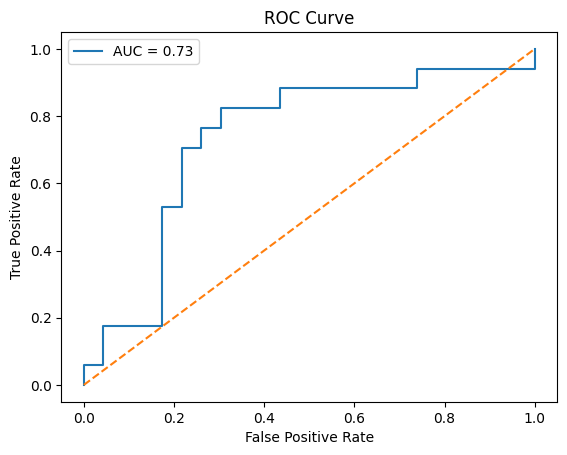

In [11]:
y_proba = rf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

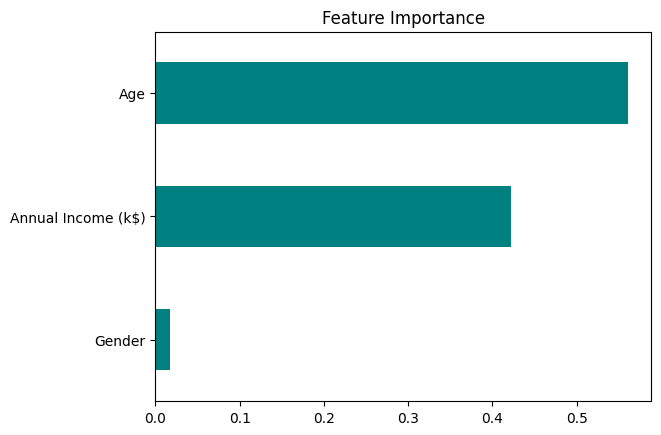

In [12]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance")
plt.show()